In [2]:
from sklearn.pipeline import * 
from sklearn.naive_bayes import * 
from sklearn.cluster import *  
from sklearn.covariance import *  
from sklearn.cross_decomposition import *  
from sklearn.datasets import *  
from sklearn.decomposition import *  
from sklearn.ensemble import *  
from sklearn.feature_extraction import *  
from sklearn.feature_extraction.text import *  
from sklearn.feature_selection import *  
from sklearn.gaussian_process import *  
from sklearn.linear_model import *  
from sklearn.manifold import *  
from sklearn.metrics import *  
from sklearn.mixture import *  
from sklearn.model_selection import *  
from sklearn.neighbors import *  
from sklearn.neural_network import *  
from sklearn.preprocessing import *  
#from sklearn_pandas import DataFrameMapper
from sklearn.svm import *  
from sklearn.tree import *  

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [12]:
iris = load_iris()
X = iris.data
y = iris.target

In [9]:
#dir(iris), iris.data, iris.feature_names, iris.target_names
#print(iris.DESCR)
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
pca = PCA(n_components=2)

In [15]:
#preprocessing - fit and then transform 
X_r = pca.fit(X).transform(X) # convert 4Fs to 2Fs
X.shape, X_r.shape

((150, 4), (150, 2))

In [18]:
print("explained variance ratio", pca.explained_variance_ratio_)
target_names = iris.target_names

explained variance ratio [0.92461872 0.05306648]


c:\python37\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


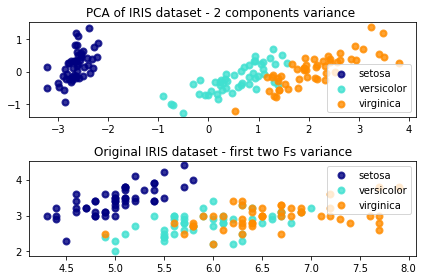

In [24]:
def draw_pca(X_r, y, target_names, ax, title):
    colors = ['navy', 'turquoise', 'darkorange']
    lw = 2
    #[0,1,2] are three Names 
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        #draw 2 pca features for each y = target_names,3 species 
        ax.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
    ax.legend(loc='best', shadow=False, scatterpoints=1)
    ax.set_title(title)
    
fig, (ax1,ax2) = plt.subplots(2,1)
draw_pca(X_r, y, target_names, ax1, 'PCA of IRIS dataset - 2 components variance ')
draw_pca(X, y, target_names, ax2, 'Original IRIS dataset - first two Fs variance')
fig.tight_layout()
fig.show()

Validation Plot 

https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html

Learning curve 

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [25]:
boston = load_boston()

In [26]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [29]:
bn = pd.read_csv("data/boston.csv")
bn[['medv', 'crim', 'rm']].corr()

,medv,crim,rm
medv,1.000000,-0.388305,0.695360
crim,-0.388305,1.000000,-0.219247
rm,0.695360,-0.219247,1.000000


In [33]:
bn.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [34]:
# Y = AX, X= rank N 

In [37]:
# Linear Regression with boston
scaler = StandardScaler()
X = scaler.fit_transform(boston.data)
y = boston.target

In [39]:
#split- test and train 
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
#Fit 
m = LinearRegression().fit(X_train, y_train)
print(m.score(X_train, y_train), #R^2 for train data = Bias 
m.score(X_test, y_test))

0.7697699488741149 0.6354638433202131


In [43]:
scores = cross_val_score(m, X_train, y_train)
scores,np.mean(scores), np.std(scores)

(array([0.76260062, 0.56956022, 0.77935231, 0.70774465, 0.79031905]),
 0.7219153693705489,
 0.08129729908048475)

In [45]:
pd.DataFrame(np.hstack((np.array(m.intercept_), m.coef_)), columns=['Coeff'], 
                      index=['Intercept']+ boston.feature_names.tolist())
#Y = 22.40 -1.011*CRIM ...

,Coeff
Intercept,22.408806
CRIM,-1.011704
ZN,1.025581
INDUS,-0.039532
CHAS,0.607312
NOX,-1.804680
RM,2.645523
AGE,-0.197836
DIS,-3.018615
RAD,2.088382


In [47]:
#Predict 
mean_squared_error(y_test,m.predict(X_test))

29.78224509230235

array([[<AxesSubplot:xlabel='CRIM', ylabel='CRIM'>,
        <AxesSubplot:xlabel='ZN', ylabel='CRIM'>,
        <AxesSubplot:xlabel='INDUS', ylabel='CRIM'>,
        <AxesSubplot:xlabel='CHAS', ylabel='CRIM'>,
        <AxesSubplot:xlabel='NOX', ylabel='CRIM'>,
        <AxesSubplot:xlabel='RM', ylabel='CRIM'>,
        <AxesSubplot:xlabel='AGE', ylabel='CRIM'>,
        <AxesSubplot:xlabel='DIS', ylabel='CRIM'>,
        <AxesSubplot:xlabel='RAD', ylabel='CRIM'>,
        <AxesSubplot:xlabel='TAX', ylabel='CRIM'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='CRIM'>,
        <AxesSubplot:xlabel='B', ylabel='CRIM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='CRIM'>],
       [<AxesSubplot:xlabel='CRIM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='INDUS', ylabel='ZN'>,
        <AxesSubplot:xlabel='CHAS', ylabel='ZN'>,
        <AxesSubplot:xlabel='NOX', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='AGE',

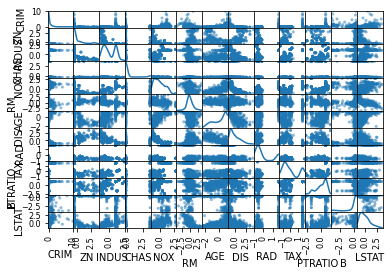

In [49]:
#Scatter matrix 
from pandas.plotting import scatter_matrix
scatter_matrix(pd.DataFrame(X, columns=boston.feature_names), diagonal='kde')

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

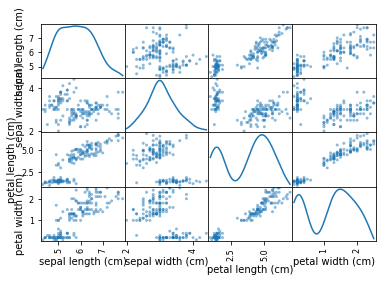

In [50]:
scatter_matrix(pd.DataFrame(iris.data, columns=iris.feature_names), diagonal='kde')

## Handling outlier - Robust Regression 
https://scikit-learn.org/stable/modules/linear_model.html#ransac-regression

## Using Regularizer 
https://scikit-learn.org/stable/modules/linear_model.html#elastic-net

## GLM

https://scikit-learn.org/stable/modules/linear_model.html#generalized-linear-regression

## Classification

In [60]:
iris = pd.read_csv('data/iris.csv')
X_raw = iris.iloc[:, 0:4].astype(np.float64)
y_raw = iris.Name
lenc = LabelEncoder()
y = lenc.fit_transform(y_raw)
sc = StandardScaler()
X = sc.fit_transform(X_raw)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
#Fit 
clf = LogisticRegression()
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train), #accuracy for train data = Bias 
clf.score(X_test, y_test))

0.9732142857142857 0.9736842105263158


In [65]:
# Pipeline
pipeline = Pipeline([('sc', sc),('clf', clf)])  #(tag, sklearn_object)
X1_train, X1_test, y1_train, y1_test = train_test_split(X_raw,y, random_state=0)
pipeline.fit(X1_train, y1_train)
pipeline.score(X1_train, y1_train), pipeline.score(X1_test, y1_test), \
  pipeline.predict(X1_test), lenc.inverse_transform(pipeline.predict(X1_test))

(0.9732142857142857,
 0.9736842105263158,
 array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
        0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2]),
 array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
        'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
        'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
        'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
        'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
        'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
        'Iris-virginica'], dtype=object))

In [67]:
# C - high value means weak Regularization
#Gridsearch
params = dict(clf__C=np.linspace(0.0001,100, num=1000)) 
#note __ to form the key pipelineTag__Hyeprparam
gs = RandomizedSearchCV(pipeline, params, random_state=0)
gs.fit(X1_train, y1_train)
gs.score(X1_train, y1_train), gs.score(X1_test, y1_test), \
  gs.predict(X1_test), lenc.inverse_transform(gs.predict(X1_test))

(0.9910714285714286,
 0.9736842105263158,
 array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
        0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2]),
 array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
        'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
        'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
        'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
        'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
        'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
        'Iris-virginica'], dtype=object))

In [68]:
#best estimator 
gs.best_estimator_

Pipeline(steps=[('sc', StandardScaler()),
                ('clf', LogisticRegression(C=68.4685))])

In [69]:
#cross_val
scores = cross_val_score(gs, X1_train, y1_train)
scores,np.mean(scores), np.std(scores)

(array([1.        , 0.95652174, 1.        , 0.95454545, 0.95454545]),
 0.9731225296442687,
 0.021957224367321962)

In [70]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## Classification metrics

<pre>
Total case = N = a+b+c+d

        Actual True                      False 
Predicted 
True        a                            b (false positive/Alarm) - Type 1 error,alpha

False       c(false negative)(type-ii)   d

</pre>

Accuracy = (a+d)/N

b or c might not be zero

precision = a/(a+b) ie FP is zero, prec 100%

sensitivity/recall = a/(a+c), if FN is zero, sensitivity is 100%

eg Fire alarm, we want 100% sensitive

specificity = d/(b+d) ie FP is zero , spec - 100%


Value 1 Is the best


In [73]:
y1_pred = gs.predict(X1_test)
confusion_matrix(y1_test, y1_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [74]:
precision_recall_fscore_support(y1_test, y1_pred, average='micro') ##Classes are not balanced

(0.9736842105263158, 0.9736842105263158, 0.9736842105263158, None)

In [75]:
precision_recall_fscore_support(y1_test, y1_pred, average='macro')#Classes are balanced

(0.9666666666666667, 0.9791666666666666, 0.9717034521788342, None)

In [77]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [78]:
## Loan - I want to identify all good customer
# sensitivity=1 means FN~ 0  or specificity=1 , FP ~ 0
# FN = 0, predicted bad which is actually good = 0

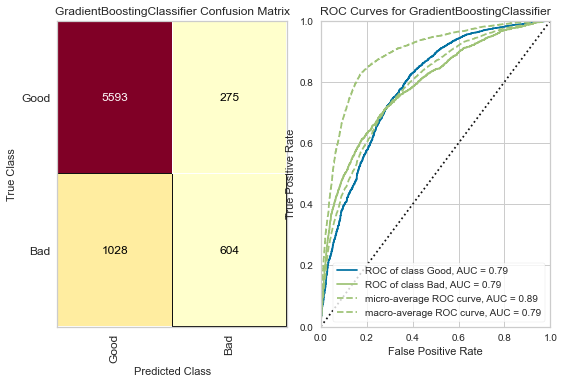

In [79]:
%run demo_code/20.5.credit.py

<pre>
        predicted 
        good           bad
Actual 
good    5593           275=Y(FN)

bad     1028=X(FP)     604


Problematic is Y is false Negative and X is FalsePositive/Alarm 
#accuracy= (tp+tn)/all
Accuracy = diagonal/Total = (5593+604)/7540  ~ 82%
#specificity= tn/(tn+fp) , FP, X -> 0
specificity = 604/(1028+604) ~ 37% - bad, X is high 
But sensitivity is good 
#sensitivity= tp/(tp+fn) , FN, Y -> 0
Sensitivity = 5593/(5593+275), ~ 95% , Y, FalseNegative should be zero 
#precision= tp/(tp+fp)
precision = 5593/(5593+1028),~ 84% , X, FalsePositive/Alarm should be zero 
</pre>

In [80]:
# Mushroom - I want to identify all bad mushrooms 
# predicted good but actually bad - FP =0, specificity = 100


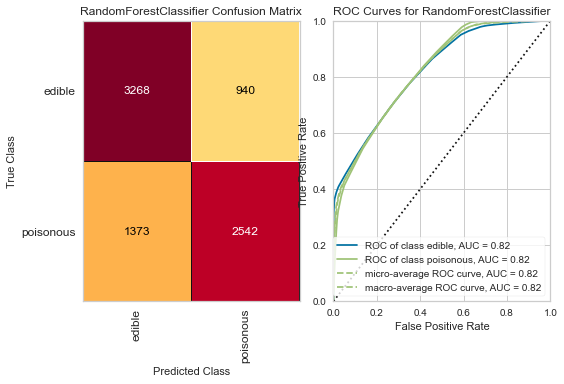

Classification report
             edible  poisonous  accuracy  macro avg  weighted avg    micro
precision     0.70       0.73      0.72       0.72          0.72     0.72
recall        0.78       0.65      0.72       0.71          0.72     0.72
f1-score      0.74       0.69      0.72       0.71          0.71     0.72
support    4208.00    3915.00      0.72    8123.00       8123.00  8123.00

Confusion Matrix
              p-edible  p-poisonous
a-edible         3264          944
a-poisonous      1369         2546

only for binary cases
         predicted
         T       F 
         ----------
       T| tp    fn 
actual  |
       F| fp    tn

accuracy= (tp+tn)/all = 0.72
precision= tp/(tp+fp) = 0.7, precision of positive class
sensitivity= tp/(tp+fn) = 0.78, recall of positive class
specificity= tn/(tn+fp) = 0.65, recall of negative class



In [81]:
% run demo_code/20.4.mushroom.py

In [84]:
import yellowbrick
yellowbrick.__version__

'1.3.post1'

In [85]:
import sklearn
sklearn.__version__

'0.24.2'

## SVM kernels


SVM-Kernels

Three different types of SVM-Kernels are displayed below.
The polynomial and RBF are especially useful when the
data-points are not linearly separable.



---------------- SVC of binary class ------------------

Some properties of Classifier
-------------------------------
clf.coef_       
    Coefficients for each feature 
    only for linear problem
clf.support_
    SupportVectorIndices 
    Vector of indices that specify the rows in the training data X, 
    that were selected as support vectors 
clf.support_vectors_  
    are subset of features (rows of X) which are used for decision boundary
clf.n_support_ 
    get number of support vectors for each class

clf.decision_function
    decision function that tells us how close to the seperating line we are 
    (close to the boundary means a low-confidence decision)
    Returns (n_samples, n_classes * (n_classes-1) / 2) for ovo, 
    for ovr, the shape is (n_samples, n_classes).
    each value is proportional to the dist

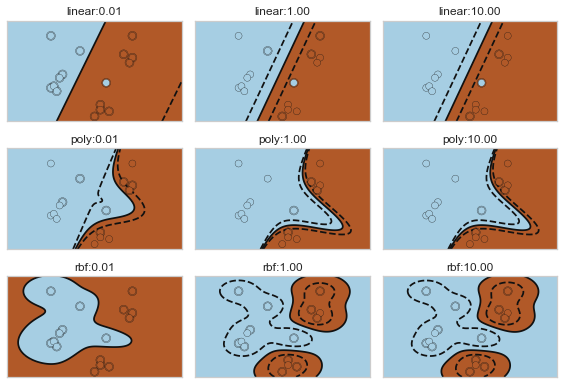

In [87]:
%run demo_code/5.1.plot_svm_kernels.py

## DT

In [88]:
%run demo_code/6.1.decision_tree.py

------------------------ iris data DecisionTreeClassifier ---------
With entropy
check default value of all params
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Training Accuracy 1.0
Test data Accuracy 0.9736842105263158
Predicted class for test data ...
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
the probability of each class can be predicted(test data)
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
We can get feature importance from DT algorithm
sepal length (cm) : 0.01832976363675285
sepal width (cm) : 0.01832976363675285
petal length (cm) : 0.8975234025752012
petal width (cm) : 0.06581707015129308
cross validated score 0.95 +/- 0.04
Generated iris_entropy.png for visualizati

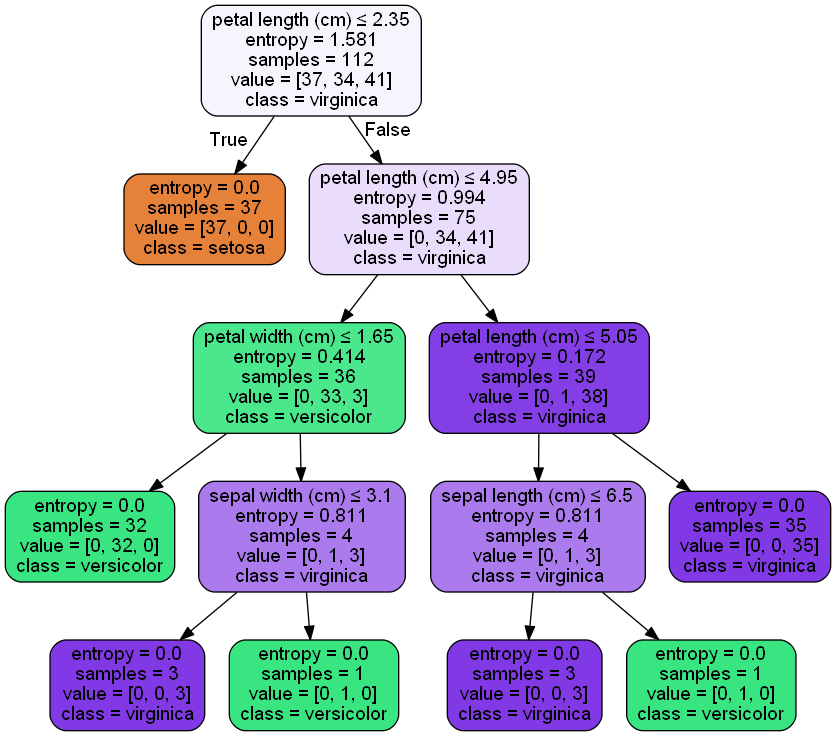

In [89]:
from IPython.display import Image
Image(filename='iris_entropy.png')

## EN

In [91]:
data = load_boston()
X, y = data.data, data.target 
CV= KFold(n_splits=5,shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X,y) #random splitting 

clf1 = DecisionTreeRegressor()
clf2 = RandomForestRegressor(n_estimators=100)
clf3 = ExtraTreesRegressor(n_estimators=100)
clf4 =  AdaBoostRegressor(n_estimators=100)
clf5 =  GradientBoostingRegressor(n_estimators=100)
clf6 = SVR(kernel='rbf')
clf7 = StackingRegressor( estimators=[
                ('lr', RidgeCV()),
                ('svr', LinearSVR(random_state=42))],
                final_estimator=RandomForestRegressor(n_estimators=10))
names = [ 'DT', 'RF', 'ER', 'Ada', 'GBM', 'SVR', "Stack"]
pipe = Pipeline([('reg', clf1)])

grid = dict(
 reg=[clf1,clf2, clf3, clf4, clf5, clf6, clf7], 
)
search = GridSearchCV(pipe, param_grid=grid)
search.fit(X_train,y_train)
search.best_estimator_,search.best_params_,search.score(X_train, y_train), search.score(X_test, y_test)

(Pipeline(steps=[('reg', ExtraTreesRegressor())]),
 {'reg': ExtraTreesRegressor()},
 1.0,
 0.768965180530727)


Gradient Boosting Train/Test Deviance(Loss) plotting

Demonstrate Gradient Boosting on the Boston housing dataset.

This example fits a Gradient Boosting model with least squares loss and
1000 regression trees of depth 4.

Plots like these can be used to determine the optimal number of trees 
(i.e. n_estimators) where error is minimized for early stopping

Ofcourse bias would increase but test error stats would be better


Base GBT with n_estimators=1000
n_estimators= 1000
	MSE: 6.4333
	Train score 0.991
	Cross val scores: Avg: 0.88  stdDev  0.022
	Train-Test variation: Avg: 0.11  stdDev  0.022
With early stopping +/ 10%, n_estimators= 157
n_estimators= 141
	MSE: 9.6952
	Train score 0.877
	Cross val scores: Avg: 0.81  stdDev  0.014
	Train-Test variation: Avg: 0.07  stdDev  0.014
n_estimators= 157
	MSE: 9.0161
	Train score 0.896
	Cross val scores: Avg: 0.8  stdDev  0.062
	Train-Test variation: Avg: 0.1  stdDev  0.062
n_estimators= 172
	MSE: 8.5401
	Train score 0.91
	Cross val scores: A

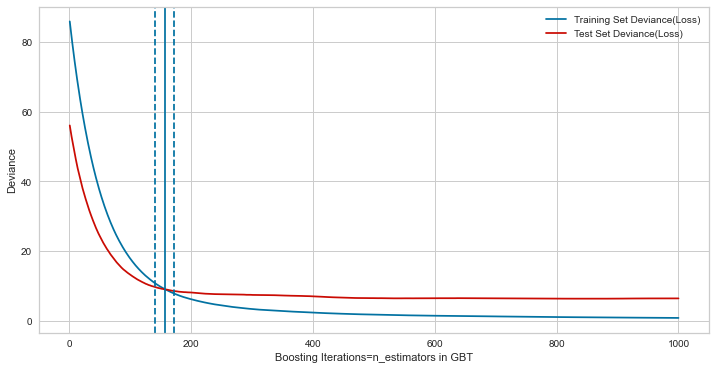


With tuned best parameters and builtin Early stopping support 
(Note: early stopping depends on the other parameters)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, max_features=0.5,
                          n_estimators=1000, n_iter_no_change=5, random_state=0,
                          subsample=0.5, tol=0.001, validation_fraction=0.2)
n_estimators= 369
	MSE: 6.1439
	Train score 0.946
	Cross val scores: Avg: 0.85  stdDev  0.004
	Train-Test variation: Avg: 0.09  stdDev  0.004


In [92]:
%run demo_code/7.1.plot_gbm_n_estimators.py


Early stopping of Gradient Boosting of Many DataSets

Early stopping support in Gradient Boosting enables us to find the least number
of iterations which is sufficient to build a model that generalizes well to
unseen data.

We specify a ``validation_fraction`` which denotes the fraction of the whole dataset 
that will be kept aside from training to assess the validation loss of the model. 

When each additional stage of regression tree is added, the validation set is
used to score the model.  This is continued until the scores of the model in
the last ``n_iter_no_change`` stages do not improve by atleast `tol`. After
that the model is considered to have converged and further addition of stages
is "stopped early".

This can significantly reduce training time, memory usage and prediction latency.

Iris Data 
	CV scores-Early Stopping:
		Train score 0.983
		Cross val scores: Avg: 0.95  stdDev  0.009
		Train-Test variation: Avg: 0.03  stdDev  0.009
	CV scores- w/o Early Stopping:
		Train 

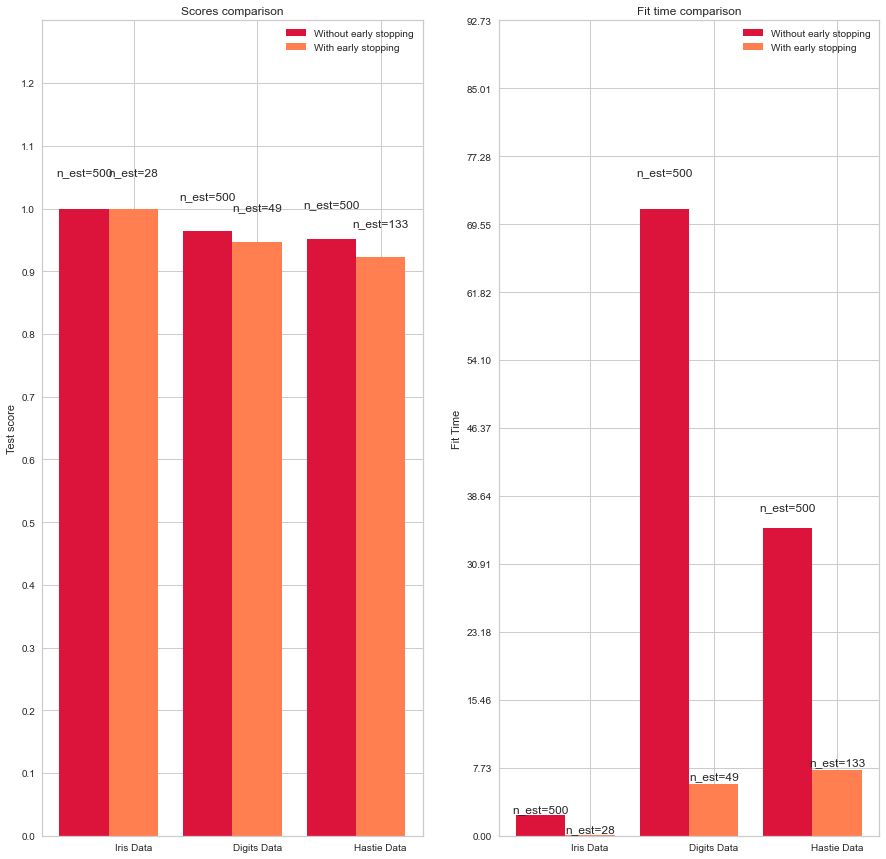

In [93]:
%run demo_code/7.1.plot_gbm_early_stopping.py

## FI

In [95]:
data = load_boston()
X, y = data.data, data.target 
X_train, X_test, y_train, y_test = train_test_split(X,y) #random splitting 
clf5 =  GradientBoostingRegressor(n_estimators=100)
clf5.fit(X_train,y_train)
df2 = pd.DataFrame(  
    clf5.feature_importances_,
    index=data.feature_names, columns=['FI'])
df2 = df2.reset_index().sort_values(by=['FI'],ascending=False)   
df2.index = df2['index']
df2.drop('index', axis=1, inplace=True)
df2['FI'] = df2.FI.apply(lambda e: "%d%%" %(e*100,))
df2

,FI
index,
LSTAT,41%
RM,32%
DIS,11%
PTRATIO,3%
CRIM,3%
NOX,3%
TAX,1%
B,0%
AGE,0%


In [97]:
##OR we could only fit with inliers 
data = load_boston()
X_raw, y_raw = data.data, data.target 
ransac = RANSACRegressor(random_state=0)
ransac.fit(X_raw, y_raw)
#Find oulier 
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
print("%", outlier_mask[outlier_mask == True].shape[0]/X_raw.shape[0])
X, y = X_raw[inlier_mask],y_raw[inlier_mask]
CV= KFold(n_splits=5,shuffle=True)

clf = LinearRegression()
scores = cross_val_score(clf, X_raw, y_raw, cv=CV)
print(scores, "\nAvg:", scores.mean(), " +/- ", scores.std())
print("Train score", clf.fit(X_raw, y_raw).score(X_raw, y_raw))

clf = GradientBoostingRegressor(n_estimators=100, random_state=0)
scores = cross_val_score(clf, X_raw, y_raw, cv=CV)
print(scores, "\nAvg:", scores.mean(), " +/- ", scores.std())
print("Train score", clf.fit(X_raw, y_raw).score(X_raw, y_raw))

print("Only with inliers")
clf = LinearRegression()
scores = cross_val_score(clf, X, y, cv=CV)
print(scores, "\nAvg:", scores.mean(), " +/- ", scores.std())
print("Train score", clf.fit(X, y).score(X, y))

clf = GradientBoostingRegressor(n_estimators=100, random_state=0)
scores = cross_val_score(clf, X, y, cv=CV)
print(scores, "\nAvg:", scores.mean(), " +/- ", scores.std())
print("Train score", clf.fit(X, y).score(X, y))

% 0.35177865612648224
[0.68614761 0.72880956 0.76199019 0.66659186 0.78411781] 
Avg: 0.7255314065142371  +/-  0.04426580779467454
Train score 0.7406426641094095
[0.90417595 0.90828509 0.9082844  0.91260992 0.85171189] 
Avg: 0.8970134486769142  +/-  0.022807306759873715
Train score 0.9761405838418584
Only with inliers
[0.86869548 0.88950845 0.88901272 0.91170825 0.88522684] 
Avg: 0.8888303470876024  +/-  0.013727995323731083
Train score 0.9005337857490847
[0.91199985 0.91666907 0.85264964 0.8009882  0.90089368] 
Avg: 0.8766400866402997  +/-  0.04413528804552502
Train score 0.9815545670278318


## TPOT
https://towardsdatascience.com/tpot-automated-machine-learning-in-python-4c063b3e5de9

In [98]:
%run demo_code/19.1.tpot_regression.py




Atleast make generations=2 and population size=100



Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -11.770554815613734

Generation 2 - Current best internal CV score: -10.611663700291484

Best pipeline: GradientBoostingRegressor(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), alpha=0.99, learning_rate=0.1, loss=huber, max_depth=4, max_features=0.7500000000000001, min_samples_leaf=2, min_samples_split=20, n_estimators=100, subsample=0.45)
Training score(neg MSE) -1.3454784886231028
Test score(neg MSE) -13.022732326626505
Generate the code ... tpot_boston_pipeline.py
Training score(R^2) 0.9838203902814848
Test score(R^2) 0.8522513587439424


In [99]:
%pycat tpot_boston_pipeline.py

In [100]:
with open('tpot_boston_pipeline.py') as f:
    print(f.read())

import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=None)

# Average CV score on the training set was: -10.611663700291484
exported_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False, interaction_only=False),
    GradientBoostingRegressor(alpha=0.99, learning_rate=0.1, loss="huber", max_depth=4, max_features=0.7500000000000001, min_samples_leaf=2, min_samples_split=20, n_estimators=100, subsample=0.45)
)

exported_pipelin

## Knn

Prediction for first: [1]
Prediction for second: [1]


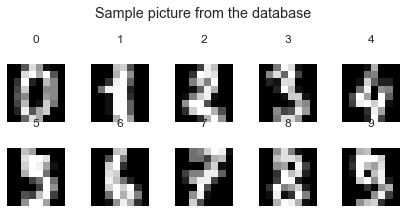

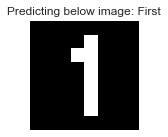

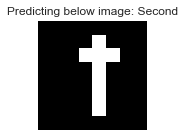

In [101]:
%run demo_code/19.4.sk_digits.py

## TFIDF

In [102]:
corpus = [
    "Hi I heard about Spark",
    "I wish Java could use case classes",
    "Logistic regression models are neat"
]

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
X.toarray()

array([[0.5       , 0.        , 0.        , 0.        , 0.        ,
        0.5       , 0.5       , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.5       , 0.        , 0.        ],
       [0.        , 0.        , 0.40824829, 0.40824829, 0.40824829,
        0.        , 0.        , 0.40824829, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.40824829, 0.40824829],
       [0.        , 0.4472136 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.4472136 , 0.4472136 ,
        0.4472136 , 0.4472136 , 0.        , 0.        , 0.        ]])

In [103]:
%run demo_code/19.2.troll.py

X.shape (3947, 16181)
Sparsity of feature matrix after TfidfVectorizer: Each sample has ~0.09% non-zero features.
Train score 0.9540703199239785 Test Score 0.7632911392405063
the 50 troll words with the largest coefficients:  like,just,xa0,idiot,fuck,don,stupid,know,ass,bitch,little,people,dumb,fucking,really,life,shit,think,say,moron,loser,make,ignorant,dick,nyou,right,time,shut,stop,need,racist,black,pathetic,man,post,dont,got,look,mother,good,nigga,lol,troll,white,did,going,fool,want,comment,way
test data: ['I totally agree with you', 'moron shut up']
[0 1]


In [104]:
%run demo_code/12.4.comparison_naive_spam.py

-------------------- Naive Bayes for spam -------------

GaussianNB 
    implements the Gaussian Naive Bayes algorithm for classification. 
    The likelihood of the features is assumed to be Gaussian
    Gaussian Naive Bayes is used in cases when all our features are continuous
MultinomialNB 
    implements the naive Bayes algorithm for multinomially distributed data
    Its is used when we have discrete data
    Classic algorithm for classification of text data with TfidfTransformer
ComplementNB 
    implements the complement naive Bayes (CNB) algorithm. 
    CNB is an adaptation of the standard multinomial naive Bayes (MNB) algorithm 
    that is particularly suited for imbalanced data sets.
    CNB uses statistics from the complement of each class to compute the model's weights. 
    The inventors of CNB show empirically that the parameter estimates for CNB 
    are more stable than those for MNB. 
    Further, CNB regularly outperforms MNB (often by a considerable margin) 
    on 

## Clusteing


The elbow method to help data scientists select the optimal number 
of clusters by fitting the model with a range of values for K. 
If the line chart resembles an arm, then the 'elbow' (the point of inflection on the curve) 
is a good indication that the underlying model fits best at that point.

Also displays the amount of time to train the clustering model per K 
as a dashed green line, 

It is important to remember that the 'elbow' method does not work well 
if the data is not very clustered. 
In this case, you might see a smooth curve and the optimal value of K 
will be unclear.




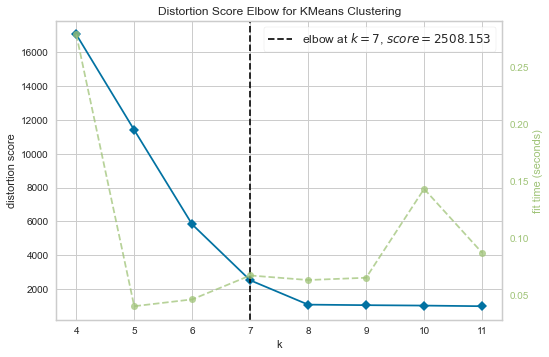

In [106]:
%run demo_code/10.1.cluster_elbow.py


Color Quantization using K-Means

Performs a pixel-wise Vector Quantization (VQ) of an image of the summer palace
(China), reducing the number of colors required to show the image from 96,615
unique colors to 64, while preserving the overall appearance quality.

In this example, pixels are represented in a 3D-space and K-means is used to
find 64 color clusters. In the image processing literature, the codebook
obtained from K-means (the cluster centers) is called the color palette. Using
a single byte, up to 256 colors can be addressed, whereas an RGB encoding
requires 3 bytes per pixel. The GIF file format, for example, uses such a
palette.

For comparison, a quantized image using a random codebook (colors picked up
randomly) is also shown.

Fitting model on a small sub-sample of the data
done in 0.745s.
Predicting color indices on the full image (k-means)
done in 0.255s.
Predicting color indices on the full image (random)
done in 0.860s.
Image with 64 random color subset of original 

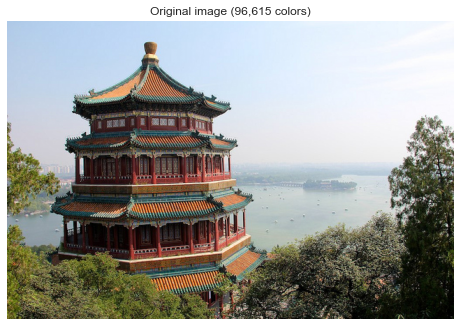

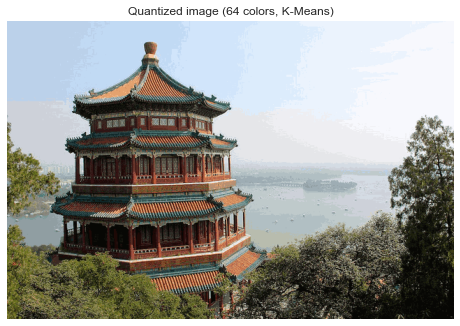

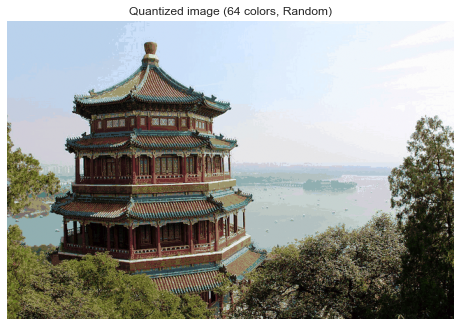

In [107]:
%run demo_code/10.5.plot_color_quantization.py